<a href="https://colab.research.google.com/github/dcolinmorgan/LTCOPDsex/blob/master/gpuPanda_%26_LTCOPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 0.5: Change colab runtime type to "GPU"

# NetZooPy Tutorial: running Panda and Lioness using GPU and precision flags

#1. Setup Environment: download, install & import latest packages

In [ ]:
import os
import s3fs
import pandas as pd
import seaborn as sns
import numpy as np
from psutil import *
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!nvcc --version

###  
##1.1 Configure cupy for installed Cuda version
1.   use cuda version based on above release (*e.g.* release 10.1= cuda101)
2.   install cupy version 7.4.0 or above 

In [ ]:
!pip install cupy-cuda101==7.4.0
import cupy as cp
# print(cp.__version__)
!pip freeze | grep cupy

     |████████████████████████████████| 361.9MB 42kB/s 
  Found existing installation: cupy-cuda101 6.5.0
    Uninstalling cupy-cuda101-6.5.0:
      Successfully uninstalled cupy-cuda101-6.5.0
cupy-cuda101==7.4.0


In [ ]:
!rm -rf netZooPy

In [ ]:
# !git clone https://github.com/netZoo/netZooPy.git
!git clone --single-branch --branch devel https://github.com/netZoo/netZooPy.git
os.chdir('netZooPy')
!pip install -e ./

In [ ]:
import netZooPy
from netZooPy.panda import Panda
from netZooPy.lioness import Lioness
os.chdir('..')

#2. Load test data we fetch the data from the [GRAND database](https://grand.networkmedicine.org/download/) 

In [ ]:
LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/cells/ppi/LCL_ppi.txt',sep='\t',header=None)
LCL_expression=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/expression/Hugo_exp1_lcl.txt',sep='\t',header=None)
coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/gpuPANDA/Hugo_motifCellLine_reduced.txt',sep='\t',header=None)
LCL_ppi.to_csv('LCL_ppi.txt',sep='\t',index=False)
LCL_expression.to_csv('Hugo_exp1_lcl.txt',sep='\t',index=False)
coding_LCL_motif.to_csv('Hugo_motifCellLine.txt',sep='\t',index=False)

In [ ]:
# os.getcwd()
expression_data='Hugo_exp1_lcl.txt'
motif_data='Hugo_motifCellLine.txt'
ppi_data='LCL_ppi.txt'


#3. Run Panda with GPU flag as 4th arguement & single precision to save memory

In [ ]:
panda_obj = Panda(expression_data, motif_data, ppi_data,computing='cpu',precision='single',save_tmp=False,save_memory = False, remove_missing=True, keep_expression_matrix = True,modeProcess = 'intersection')

In [ ]:
panda_obj2= Panda(expression_data, motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=True, keep_expression_matrix = True,modeProcess = 'intersection')

In [ ]:
# import matplotlib.pyplot as plt

plt.hist(np.abs(lioness_obj2.export_lioness_results[1]-lioness_obj.export_lioness_results[1]),bins=100,log=True)

In [ ]:
lioness_obj2 = Lioness(panda_obj2,start=1, end=5, save_dir='lioness_output', save_fmt='txt')#,save_tmp=False,save_memory = True, remove_missing=True, keep_expression_matrix = False,modeProcess = 'intersection')

In [ ]:
lioness_obj = Lioness(panda_obj2,computing='gpu',start=1, end=5, save_dir='lioness_output', save_fmt='txt')#,save_tmp=False,save_memory = True, remove_missing=True, keep_expression_matrix = False,modeProcess = 'intersection')

In [ ]:
i=1
#normalize
panda_obj2.expression_matrix=np.random.randn(100,5)
expression_matrix=zscore(panda_obj2.expression_matrix,axis=1)
#orig corr
correlation_matrix0 = np.corrcoef(panda_obj2.expression_matrix)
np.fill_diagonal(correlation_matrix0, 1)

##subject normalized expression
subj_exp=expression_matrix[:, i]
n_conditions = expression_matrix.shape[1]

##not subject correlation
idx = [x for x in range(n_conditions) if x != i]
correlation_matrix1 = np.corrcoef(panda_obj2.expression_matrix[:, idx])
np.fill_diagonal(correlation_matrix1, 1)

##not subject correlation
correlation_matrix2 = ((((n_conditions-1) * (correlation_matrix0)) - (np.array([subj_exp]).T * subj_exp)) /(n_conditions-2))
np.fill_diagonal(correlation_matrix2, 1)
plt.hist(np.abs(correlation_matrix1.flatten()-correlation_matrix2.flatten()),log=True)

In [ ]:
plt.hist(panda_obj2.expression_matrix.flatten())

In [ ]:
from matplotlib_venn import venn3, venn3_circles





In [ ]:
panda_obj2.expression_matrix.shape

(1000, 127)

##GPU and CPU info:

In [ ]:
!nvidia-smi

In [ ]:
!cat /proc/cpuinfo

# LTCOPD sex analysis (GSE76925)

In [ ]:
!pip install GEOparse

In [ ]:
# https://geoparse.readthedocs.io/en/latest/Analyse_hsa-miR-124a-3p_transfection_time-course.html#
import GEOparse
gse = GEOparse.get_GEO(geo="GSE76925", destdir="./")
# gse = GEOparse.get_GEO(filepath="GSE76925_family.soft.gz")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# illumina_labels=pd.read_csv('drive/My Drive/Colab Notebooks/illumina_labels.txt',sep=';',header=0)
illumina_labels=pd.read_csv('drive/My Drive/Colab Notebooks/GPL10558_illumina_prb_loc.txt',sep='\t',index_col=0,header=None,names=['loc','symbol'])

In [ ]:
gpl = gse.gpls[next(iter(gse.gpls))]
data = gse.pivot_samples(values="VALUE")#, gpl=gpl, annotation_column="Symbol")
data.sort_index

In [ ]:
# import seaborn as sns
# sns.set(rc={'figure.figsize':(100,80)})
# data.hist()
# sns.despine(offset=10, trim=True)

In [ ]:
pheno=gse.phenotype_data.rename(columns={'characteristics_ch1.0.age': 'age',"characteristics_ch1.1.Sex":"sex","characteristics_ch1.3.bmi":"bmi","characteristics_ch1.6.fev1.pp":"fev1","characteristics_ch1.4.packyears":"PY"})
pheno[['age',"sex","bmi","fev1","PY"]].to_csv('pheno_data.txt',sep='\t',index=True,header=True)


In [ ]:
# data.to_csv('GPL10558.txt',sep='\t',index=True,header=False)

data2=data.merge(illumina_labels['symbol'],left_index=True,right_index=True)
data2.index=data2['symbol']
del data2['symbol']
data2.columns=[gse.phenotype_data['characteristics_ch1.1.Sex']+gse.phenotype_data['characteristics_ch1.5.copd']]

data2.loc[:,'Mcase'].to_csv('Mcase.txt',sep='\t',index=True,header=False)
data2.loc[:,'Mcont'].to_csv('Mcont.txt',sep='\t',index=True,header=False)

data3=data.merge(illumina_labels,left_index=True,right_index=True)
data3.index=data3['symbol']
data3=data3[data3['loc']!='Y']
del data3['symbol'], data3['loc']
data3.columns=[gse.phenotype_data['characteristics_ch1.1.Sex']+gse.phenotype_data['characteristics_ch1.5.copd']]


data3.loc[:,'Fcase'].to_csv('Fcase.txt',sep='\t',index=True,header=False)
data3.loc[:,'Fcont'].to_csv('Fcont.txt',sep='\t',index=True,header=False)


In [ ]:
LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/ppi/ppi_complete.txt',sep='\t',header=None)
LCL_ppi.to_csv('ppi_complete.txt',sep='\t',index=False,header=False)

coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/motifs/Hugo_motifCellLine.txt',sep='\t',header=None)
coding_LCL_motif.to_csv('coding_LCL_motif.txt',sep='\t',index=False,header=False)

# expression_data='GPL10558.txt'
motif_data='coding_LCL_motif.txt'
ppi_data='ppi_complete.txt'

In [ ]:
# panda_obj = Panda(expression_data, motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=True, keep_expression_matrix = True,modeProcess = 'intersection')
# panda_obj11 = Panda('Fcase.txt', motif_data, ppi_data,computing='cpu',save_tmp=False,save_memory = False, remove_missing=True, keep_expression_matrix = False,modeProcess = 'intersection')
# panda_obj22 = Panda('Mcase.txt', motif_data, ppi_data,computing='cpu',save_tmp=False,save_memory = False, remove_missing=True, keep_expression_matrix = False,modeProcess = 'intersection')

panda_obj1 = Panda('Fcase.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=True, keep_expression_matrix = False,modeProcess = 'intersection')
panda_obj2 = Panda('Mcase.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=True, keep_expression_matrix = False,modeProcess = 'intersection')
panda_obj3 = Panda('Fcont.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=True, keep_expression_matrix = False,modeProcess = 'intersection')
panda_obj4 = Panda('Mcont.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=True, keep_expression_matrix = False,modeProcess = 'intersection')

In [ ]:
# [panda_obj22.expression.shape,panda_obj11.expression.shape]
# panda_obj.save_panda_results('single_gpu_GSE76925_panda.txt')
# panda_obj1.export_panda_results
np.save('Panda_Fcase.npy',panda_obj1.export_panda_results)
np.save('Panda_Mcase.npy',panda_obj2.export_panda_results)
np.save('Panda_Fcont.npy',panda_obj3.export_panda_results)
np.save('Panda_Mcont.npy',panda_obj4.export_panda_results)

M V F control

In [ ]:
# panda_obj3.panda_results = pd.DataFrame(panda_obj3.export_panda_results, columns=['tf','gene','motif','force'])

# subset_panda_results3 = panda_obj3.panda_results.sort_values(by=['force'], ascending=False)
# # subset_panda_results3 = subset_panda_results3[subset_panda_results3.tf != subset_panda_results3.gene]
# # subset_panda_results3 = subset_panda_results3[0:500]
# subset_panda_results3['merge']=subset_panda_results3.tf+'-'+subset_panda_results3.gene

# panda_obj4.panda_results = pd.DataFrame(panda_obj4.export_panda_results, columns=['tf','gene','motif','force'])

# subset_panda_results4 = panda_obj4.panda_results.sort_values(by=['force'], ascending=False)
# # subset_panda_results4 = subset_panda_results4[subset_panda_results4.tf != subset_panda_results4.gene]
# # subset_panda_results4 = subset_panda_results4[0:500]
# subset_panda_results4['merge']=subset_panda_results4.tf+'-'+subset_panda_results4.gene

# www=subset_panda_results3.merge(subset_panda_results4, left_on='merge', right_on='merge')
# www['diff']=www.force_x-www.force_y
# www = www.sort_values(by ='diff' )
# plt.bar(www['diff'])
wwww=www[np.abs(www['diff'])>3]

# len(pd.unique(wwww['gene_x']))
# import seaborn as sns
# plt.figure(figsize=(12, 30))

# g=sns.barplot(x="diff", y="merge", data=wwww)
# g.set(xlim=(-4.5, 4.5))

M V F cases

In [ ]:
# ##CPU compare
# panda_obj1.panda_results = pd.DataFrame(panda_obj1.export_panda_results, columns=['tf','gene','motif','force'])

# subset_panda_results1 = panda_obj1.panda_results.sort_values(by=['force'], ascending=False)
# # subset_panda_results1 = subset_panda_results1[subset_panda_results1.tf != subset_panda_results1.gene]
# # subset_panda_results1 = subset_panda_results1[0:500]
# subset_panda_results1['merge']=subset_panda_results1.tf+'-'+subset_panda_results1.gene

# panda_obj2.panda_results = pd.DataFrame(panda_obj2.export_panda_results, columns=['tf','gene','motif','force'])

# subset_panda_results2 = panda_obj2.panda_results.sort_values(by=['force'], ascending=False)
# # subset_panda_results2 = subset_panda_results2[subset_panda_results2.tf != subset_panda_results2.gene]
# # subset_panda_results2 = subset_panda_results2[0:500]
# subset_panda_results2['merge']=subset_panda_results2.tf+'-'+subset_panda_results2.gene

# ww=subset_panda_results1.merge(subset_panda_results2, left_on='merge', right_on='merge')
# ww['diff']=ww.force_x-ww.force_y
# ww = ww.sort_values(by ='diff' )
# ww
# zzzz=ww[np.abs(ww['diff'])>3]
# zzzz
# len(pd.unique(zzzz['tf_x']))
# import seaborn as sns
plt.figure(figsize=(12, 30))

g=sns.barplot(x="diff", y="merge", data=zzzz)
g.set(xlim=(-4.5, 4.5))


In [ ]:
Panda_Fcase=np.load('drive/My Drive/Panda_Fcase.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_Mcase=np.load('drive/My Drive/Panda_Mcase.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_Fcont=np.load('drive/My Drive/Panda_Fcont.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_Mcont=np.load('drive/My Drive/Panda_Mcont.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])



F Cases V F Controls

In [ ]:
##RUN ABOVE
# panda_obj3.panda_results = pd.DataFrame(panda_obj3.export_panda_results, columns=['tf','gene','motif','force'])
# subset_panda_results3 = panda_obj3.panda_results.sort_values(by=['force'], ascending=False)
# subset_panda_results3['merge']=subset_panda_results3.tf+'-'+subset_panda_results3.gene

# panda_obj1.panda_results = pd.DataFrame(panda_obj1.export_panda_results, columns=['tf','gene','motif','force'])
# subset_panda_results1 = panda_obj1.panda_results.sort_values(by=['force'], ascending=False)
# subset_panda_results1['merge']=subset_panda_results1.tf+'-'+subset_panda_results1.gene

# www=subset_panda_results3.merge(subset_panda_results1, left_on='merge', right_on='merge')
# www['diff']=www.force_x-www.force_y
# www = www.sort_values(by ='diff' )
# # plt.bar(www['diff'])
# wwww=www[np.abs(www['diff'])>3]
# wwww
# len(pd.unique(wwww['tf_x']))
# import seaborn as sns
# plt.figure(figsize=(12, 30))

# g=sns.barplot(x="diff", y="merge", data=wwww)
# g.set(xlim=(-4.5, 4.5))
# wwww.to_csv('female_caVco.txt')
# pd.DataFrame([pd.unique(wwww['tf_x']),pd.unique(wwww['gene_x'])]).to_csv('unqiue_female_caVco.txt',sep='\t',header=None,index=None)


##loaded from save npy
Panda_Fcase=pd.DataFrame(Panda_Fcase,columns=['tf','gene','motif','force'])
Panda_Fcase_results = Panda_Fcase.sort_values(by=['force'], ascending=False)
Panda_Fcase_results['link']=Panda_Fcase_results.tf+'-'+Panda_Fcase_results.gene

Panda_Fcont=pd.DataFrame(Panda_Fcont,columns=['tf','gene','motif','force'])
Panda_Fcont_results = Panda_Fcont.sort_values(by=['force'], ascending=False)
Panda_Fcont_results['link']=Panda_Fcont_results.tf+'-'+Panda_Fcont_results.gene
##Female now lack Y chr links
ww=Panda_Fcase_results.merge(Panda_Fcont_results, left_on='link', right_on='link')
ww['diff']=ww.force_x-ww.force_y
ww = ww.sort_values(by ='diff' )


In [ ]:
[www.size,ww.size]

[91335960, 91329600]

In [ ]:
# www.to_csv('female_noY_caVco.txt')
np.save('female_noY_caVco.npy',ww[['tf_x','gene_x','diff']])
# ww[['tf_x','gene_x','diff']].to_csv('female_noY_caVcoDiff.txt')



M Cases V M Controls

In [ ]:
##RUN ABOVE
# panda_obj4.panda_results = pd.DataFrame(panda_obj4.export_panda_results, columns=['tf','gene','motif','force'])
# subset_panda_results4 = panda_obj4.panda_results.sort_values(by=['force'], ascending=False)
# subset_panda_results4['merge']=subset_panda_results4.tf+'-'+subset_panda_results4.gene

# panda_obj2.panda_results = pd.DataFrame(panda_obj2.export_panda_results, columns=['tf','gene','motif','force'])
# subset_panda_results2 = panda_obj2.panda_results.sort_values(by=['force'], ascending=False)
# subset_panda_results2['merge']=subset_panda_results2.tf+'-'+subset_panda_results2.gene

# ww=subset_panda_results4.merge(subset_panda_results2, left_on='merge', right_on='merge')
# ww['diff']=ww.force_x-ww.force_y
# ww = ww.sort_values(by ='diff' )

# zzzz=ww[np.abs(ww['diff'])>3]
# zzzz
# len(pd.unique(zzzz['gene_x']))
# import seaborn as sns
# plt.figure(figsize=(12, 30))

# g=sns.barplot(x="diff", y="merge", data=zzzz)
# g.set(xlim=(-4.5, 4.5))
# zzzz.to_csv('male_caVco.txt')
# [pd.unique(zzzz['tf_x']),pd.unique(zzzz['gene_x'])]
# pd.DataFrame([pd.unique(zzzz['tf_x']),pd.unique(zzzz['gene_x'])]).to_csv('unqiue_male_caVco.txt',sep='\t',header=None,index=None)


##loaded from save npy
Panda_Mcase=pd.DataFrame(Panda_Mcase,columns=['tf','gene','motif','force'])
Panda_Mcase_results = Panda_Mcase.sort_values(by=['force'], ascending=False)
Panda_Mcase_results['link']=Panda_Mcase_results.tf+'-'+Panda_Mcase_results.gene

Panda_Mcont=pd.DataFrame(Panda_Mcont,columns=['tf','gene','motif','force'])
Panda_Mcont_results = Panda_Mcont.sort_values(by=['force'], ascending=False)
Panda_Mcont_results['link']=Panda_Mcont_results.tf+'-'+Panda_Mcont_results.gene
##Female now lack Y chr links
www=Panda_Mcase_results.merge(Panda_Mcont_results, left_on='link', right_on='link')
www['diff']=www.force_x-www.force_y
www = www.sort_values(by ='diff' )

In [ ]:
# www[['tf_x','gene_x','diff']].to_csv('male_yesY_caVcoDiff.txt')
np.save('male_yesY_caVco.npy',www[['tf_x','gene_x','diff']])


In [ ]:
# male=www[['tf_x','gene_x','diff']]
# female=ww[['tf_x','gene_x','diff']]
# DIFF=male.merge(female, left_on=['tf_x','gene_x'], right_on=['tf_x','gene_x'])
# DIFF.to_csv('M2F_caVcoDiff.txt')



/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
plt.scatter(DIFF.diff_x,DIFF.diff_y)

In [ ]:

wwww=www[np.abs(www['diff'])>3]
# wwww
# len(pd.unique(wwww['tf_x']))
plt.figure(figsize=(12, 30))
# plt.bar(wwww['diff'])
g=sns.barplot(x="diff", y="link", data=wwww)
g.set(xlim=(-4.5, 4.5))


In [ ]:
# sexdiff=wwww.merge(zzzz,left_on='merge', right_on='merge')
plt.figure(figsize=(6, 15))
sexdiff['sexdiff']=sexdiff['diff_x']-sexdiff['diff_y']
sns.barplot(data=sexdiff,x='sexdiff',y='merge')
# g=sns.barplot(x="diff", y="merge", data=wwww)
# g.set(xlim=(-4.5, 4.5))

In [ ]:
import networkx as nx
import collections

In [ ]:
DIFF=pd.read_csv('drive/My Drive/M2F_caVcoDiff.txt',sep=',',index_col=0)#header=None,names=['tf','gene','Mdiff','Fdiff'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
Fmax=DIFF[np.abs(DIFF.diff_y)>1]
Mmax=DIFF[np.abs(DIFF.diff_x)>1]

In [ ]:
plt.hist(DIFF.diff_y,bins=100)
plt.hist(DIFF.diff_x,bins=100)

In [ ]:
female=nx.from_pandas_edgelist(Fmax, source='tf_x', target='gene_x', edge_attr='diff_y')

male=nx.from_pandas_edgelist(Mmax, source='tf_x', target='gene_x', edge_attr='diff_x')

# COPD_GWAS_genes = pd.read_csv('drive/My Drive/Colab Notebooks/COPD_gwas_genes.txt',usecols=[0],header=None)
# pos = nx.draw_kamada_kawai(female)
# pos = nx.draw_spectral(female)

# nx.draw_networkx(female, pos=pos,mfont_size=4, node_color='blue',node_size=300, font_color='white',edge_color='black')
# COPD_GWAS_genes

(array([2.592e+03, 8.850e+02, 2.100e+02, 6.200e+01, 2.200e+01, 9.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 4.000e+00]),
 array([   0. ,  136.2,  272.4,  408.6,  544.8,  681. ,  817.2,  953.4,
        1089.6, 1225.8, 1362. ]),
 <a list of 10 Patch objects>)

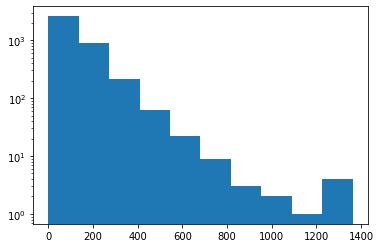

In [ ]:
ff=pd.DataFrame(female.degree).sort_values(by=1)
mm=pd.DataFrame(male.degree).sort_values(by=1)
data1=mm.merge(ff,on=[0])
data1['deg_diff']=data1['1_x']-data1['1_y']
plt.hist(np.abs(data1.deg_diff),log=True)

In [ ]:
data1

,0,1_x,1_y,deg_diff
0,FGFBP3,1,8,-7
1,ABHD16A,1,3,-2
2,TNFRSF12A,1,313,-312
3,RTEL1,1,13,-12
4,CASKIN1,1,1,0
...,...,...,...,...
3785,ZNF263,4828,3636,1192
3786,MAZ,5030,4012,1018
3787,ZNF148,5041,3782,1259
3788,SP3,5448,4201,1247


In [ ]:
data2 = data1.rename({0: 'gene', '1_x': 'male','1_y':'female'}, axis=1)
data2

,gene,male,female,deg_diff
0,FGFBP3,1,8,-7
1,ABHD16A,1,3,-2
2,TNFRSF12A,1,313,-312
3,RTEL1,1,13,-12
4,CASKIN1,1,1,0
...,...,...,...,...
3785,ZNF263,4828,3636,1192
3786,MAZ,5030,4012,1018
3787,ZNF148,5041,3782,1259
3788,SP3,5448,4201,1247


In [ ]:
cc=pd.melt(data2, id_vars='gene', value_vars=['male', 'female'])
cc['log']=np.log(cc.value)
cc

,gene,variable,value,log
0,FGFBP3,male,1,0.000000
1,ABHD16A,male,1,0.000000
2,TNFRSF12A,male,1,0.000000
3,RTEL1,male,1,0.000000
4,CASKIN1,male,1,0.000000
...,...,...,...,...
7575,ZNF263,female,3636,8.198639
7576,MAZ,female,4012,8.297045
7577,ZNF148,female,3782,8.238008
7578,SP3,female,4201,8.343078


Text(0, 0.5, 'log degree')

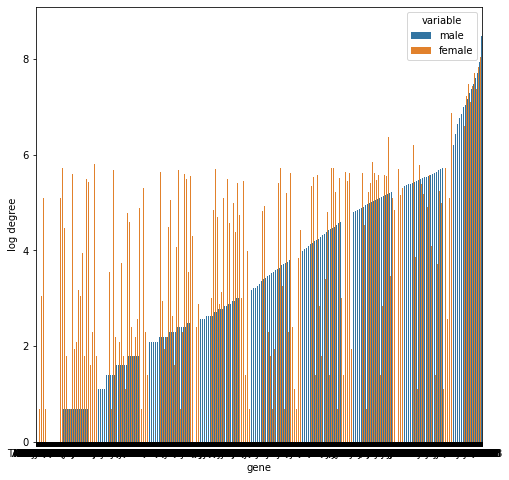

In [ ]:
plt.figure(figsize=(8, 8))
chart = sns.barplot(x="gene", y="log", hue="variable", data=cc)
plt.xlabel("gene")
plt.ylabel("log degree")
# plt.title("")
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [ ]:
# nx.density(sexdiff)
# nx.number_of_edges(sexdiff)
# nx.number_strongly_connected_components(sexdiff)
nx.number_of_cliques(sexdiff)

In [ ]:
female=nx.from_pandas_edgelist(zzzz, source='tf_x', target='gene_x', edge_attr='diff')
# COPD_GWAS_genes = pd.read_csv('drive/My Drive/Colab Notebooks/COPD_gwas_genes.txt',usecols=[0],header=None)
# pos = nx.draw_kamada_kawai(female)
pos = nx.draw_spectral(female)

nx.draw_networkx(female, pos=pos,mfont_size=4, node_color='blue',node_size=300, font_color='white',edge_color='black')
# COPD_GWAS_genes

In [ ]:
male=nx.from_pandas_edgelist(wwww, source='tf_x', target='gene_x', edge_attr='diff')
# COPD_GWAS_genes = pd.read_csv('drive/My Drive/Colab Notebooks/COPD_gwas_genes.txt',usecols=[0],header=None)
pos = nx.draw_spectral(male)
nx.draw_networkx(male, pos=pos,font_size=4, node_color='blue',node_size=300, font_color='white',edge_color='black')
# COPD_GWAS_genes

# VENN DIAGRAM for methylation benchmark

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(18,18))

from google.colab import drive
drive.mount('/content/drive')

<Figure size 1296x1296 with 0 Axes>

In [ ]:
A549=pd.read_csv('drive/My Drive/Colab Notebooks/all12345.txt',sep='\t',names=['chr','start','end','type'])


In [ ]:
a=A549[A549['type']=='me']
b=A549[A549['type']=='chip']
c=A549[A549['type']=='wg']
new_df1 = pd.merge(a, b, left_on=['chr','start','end'], right_on = ['chr','start','end'])
new_df2 = pd.merge(a, c, left_on=['chr','start','end'], right_on = ['chr','start','end'])
new_df3 = pd.merge(b, c, left_on=['chr','start','end'], right_on = ['chr','start','end'])
new_df4 = pd.merge(new_df1, c, left_on=['chr','start','end'], right_on = ['chr','start','end'])


In [ ]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
v3 = venn3(subsets = {'100':len(a.drop_duplicates()), '010':len(b.drop_duplicates()), '110':len(new_df1.drop_duplicates()),
                      '001':len(c.drop_duplicates()), '101':len(new_df2.drop_duplicates()), '011':len(new_df3.drop_duplicates()), '111':len(new_df4.drop_duplicates())},
           set_labels = ('', '', ''))
# plt.figure( figsize =(7,7) )
v3.get_patch_by_id('100').set_color('red')
v3.get_patch_by_id('010').set_color('yellow')
v3.get_patch_by_id('001').set_color('blue')
v3.get_patch_by_id('110').set_color('orange')
v3.get_patch_by_id('101').set_color('purple')
v3.get_patch_by_id('011').set_color('green')
v3.get_patch_by_id('111').set_color('grey')

v3.get_label_by_id('100').set_text('MEarray=\n'+str(len(a.drop_duplicates())))
v3.get_label_by_id('010').set_text('ChIP=\n'+str(len(b.drop_duplicates())))
v3.get_label_by_id('001').set_text('WGBS=\n'+str(len(c.drop_duplicates())))
# v3.get_label_by_id('110').set_text('MEarray V ChIP=\n'+str(len(new_df1.drop_duplicates())))
# v3.get_label_by_id('101').set_text('MEarray V WGBS=\n'+str(len(new_df2.drop_duplicates())))
# v3.get_label_by_id('011').set_text('wgbs V ChIP=\n'+str(len(new_df3.drop_duplicates())))
# v3.get_label_by_id('111').set_text('intersect='+str(len(new_df4.drop_duplicates()))+'\n')
plt.title("Overlap Venn diagram")
plt.tight_layout()

for text in v3.subset_labels:
    text.set_fontsize(13)

plt.show()

In [ ]:
import pandas as pd
import cupy as cp
import numpy as np
a=LCL_expression.iloc[:,1:127]
aa=cp.array(a)
z=cp.asnumpy(cp.linalg.matrix_rank(aa))
zz=np.linalg.matrix_rank(a)
b=cp.corrcoef(aa)
ww=cp.linalg.cond(b, p='fro')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install cmapPy

     |████████████████████████████████| 153kB 4.4MB/s 


In [ ]:
import cmapPy.pandasGEXpress.parse_gct as pg

In [ ]:
female=pg.parse('drive/My Drive/Colab Notebooks/female_panda_ltcopd.gct')
male=pg.parse('drive/My Drive/Colab Notebooks/male_panda_ltcopd.gct')

In [ ]:
female.row_metadata_df.to_csv('female_ltcopd_cluereg.csv',sep='\t',index='name')

In [ ]:
male.row_metadata_df.to_csv('male_ltcopd_cluereg.csv',sep='\t',index='name')